<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/AUSrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and dataset

In [ ]:
####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/weatherAUS.csv'
df = pd.read_csv(path)

In [ ]:
sns.set_style("whitegrid")
plt.style.use("seaborn-whitegrid")

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

### Check Dataset

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Replace null values (or drop)

In [ ]:
####
full = df.copy()
# Trying to predict rainfall, so remove na rainfall values
df = df.dropna(axis = 'rows',subset = ['RainTomorrow','Rainfall'])
df = df.fillna(df.mean())
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

### Transform data (datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [ ]:
#### 
# Convert to datetime
df['Date'] = pd.to_datetime(df.Date,format = "%Y-%m-%d" )

### Create dummy variable for objects

#### Location

In [ ]:
df.Location.value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Adelaide            3020
Launceston          3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


In [ ]:
####
def barPlot(df,x,y,figx = 16,figy = 9):
  plt.figure(figsize = (figx,figy))
  sns.barplot(x,y,data = df, palette='pastel')
  plt.title('%s vs %s' % (x,y))
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


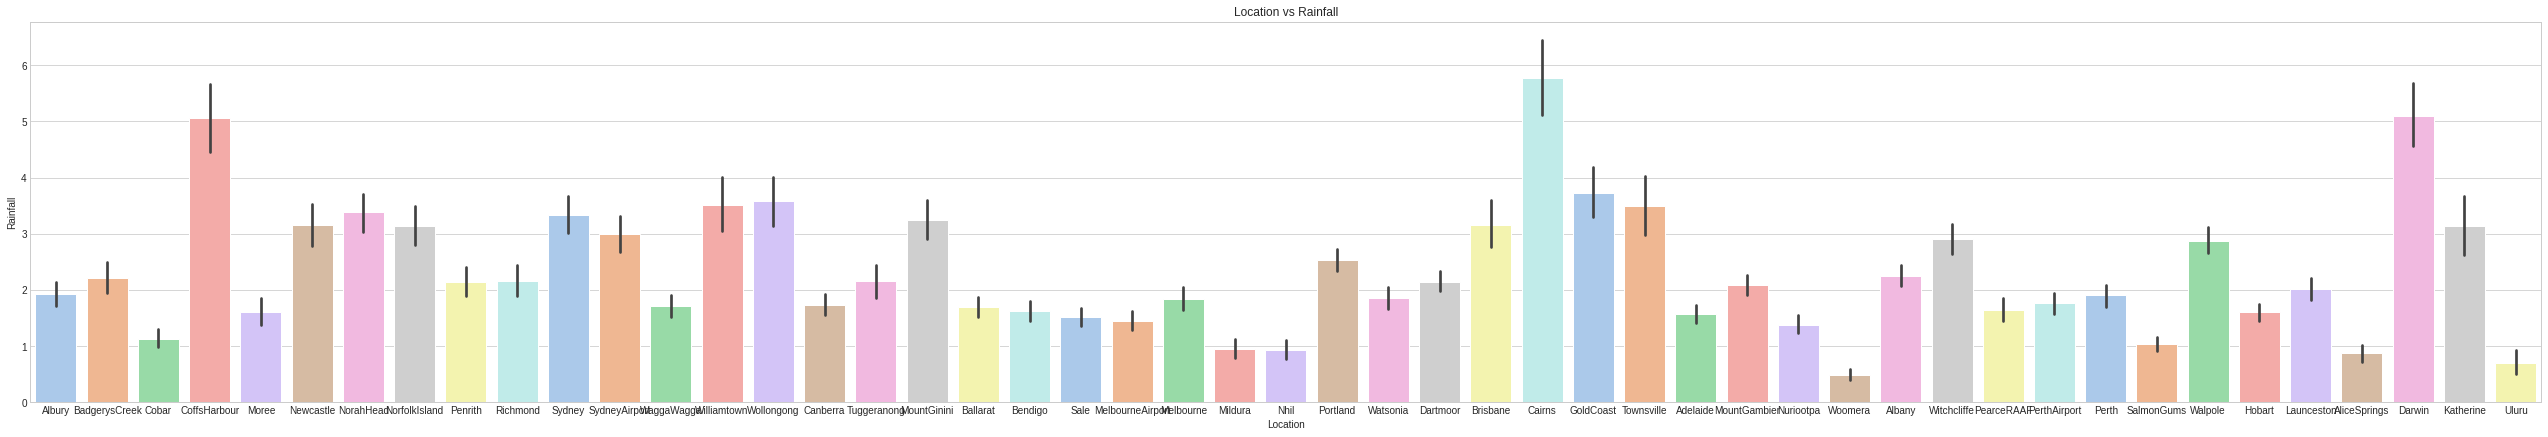

In [ ]:
barPlot(df,'Location','Rainfall',45,7)

Group location against rainfall, so we could put similar location together.

In [ ]:
####
locationXrain = df.groupby('Location').agg({'Rainfall':['mean']}).reset_index()
locationXrain.columns = ['Location','Rain']
locationXrain = locationXrain.sort_values(by = ['Rain'],ascending = False)
locationXrain['rain_level'] = pd.cut(locationXrain.Rain,5,labels = ['1','2','3','4','5'])

In [ ]:
####
df=df.merge(locationXrain[['Location','rain_level']],left_on='Location',right_on='Location')

In [ ]:
####
def getDummy(df,col = 'rain_level'):
  tmp = pd.get_dummies(df[col],drop_first=True)
  df2 = pd.concat([df,tmp],axis=1)
  df2 = df2.drop(columns = [col])
  return df2
df = getDummy(df)
df = df.rename(columns = {'2':'region2','3':'region3','4':'region4','5':'region5'})

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,region2,region3,region4,region5
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No,1,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No,1,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No,1,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No,1,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,1,0,0,0


Drop location column and create a dictionary that stores the location and corresponded regions.

In [ ]:
####
def colname(df,key,value):
  cols = df[key]
  vals = df[value]
  dictionary = dict()
  for i, name in enumerate(cols):
    if name in dictionary:
      dictionary[name].append(vals[i])
    else:
      dictionary[name] = vals[i]
  return dictionary
location_to_region = colname(locationXrain,'Location','rain_level')
df = df.drop(columns='Location')

In [ ]:
location_to_region

{'Adelaide': '3',
 'Albany': '2',
 'Albury': '3',
 'AliceSprings': '3',
 'BadgerysCreek': '1',
 'Ballarat': '2',
 'Bendigo': '1',
 'Brisbane': '1',
 'Cairns': '2',
 'Canberra': '2',
 'Cobar': '2',
 'CoffsHarbour': '2',
 'Dartmoor': '2',
 'Darwin': '2',
 'GoldCoast': '1',
 'Hobart': '1',
 'Katherine': '5',
 'Launceston': '1',
 'Melbourne': '2',
 'MelbourneAirport': '2',
 'Mildura': '2',
 'Moree': '3',
 'MountGambier': '3',
 'MountGinini': '2',
 'Newcastle': '5',
 'Nhil': '3',
 'NorahHead': '3',
 'NorfolkIsland': '2',
 'Nuriootpa': '1',
 'PearceRAAF': '2',
 'Penrith': '3',
 'Perth': '3',
 'PerthAirport': '2',
 'Portland': '2',
 'Richmond': '2',
 'Sale': '3',
 'SalmonGums': '3',
 'Sydney': '5',
 'SydneyAirport': '4',
 'Townsville': '2',
 'Tuggeranong': '1',
 'Uluru': '3',
 'WaggaWagga': '2',
 'Walpole': '3',
 'Watsonia': '1',
 'Williamtown': '2',
 'Witchcliffe': '2',
 'Wollongong': '2',
 'Woomera': '1'}

location_to_region to view how locations map to region numbers

#### RainToday RainTomorrow

In [ ]:
####
df = df.replace(['No','Yes'],[0,1])

#### WindGustDir WindDir9am WindDir3pm 

In [20]:
####
def getDummy(df,prefixes,col = 'rain_level'):
  tmp = pd.get_dummies(df[col],drop_first=True,prefix=prefixes)
  df2 = pd.concat([df,tmp],axis=1)
  df2 = df2.drop(columns = [col])
  return df2

In [21]:
#df = getDummy(df,col = 'WindGustDir',colname = ['GustENE','GustESE','GustN','GustNE','GustNNE','GustNNW','GustNW','GustS','GustSE','GustSSE','GustSSW','GustSW','GustW','GustWNW','GustWSW'])
#df = getDummy(df,col = 'WindDir9am',colname = ['9ENE','9ESE','9N','9NE','9NNE','9NNW','9NW','9S','9SE','9SSE','9SSW','9SW','9W','9WNW','9WSW'])
#df = getDummy(df,col = 'WindDir3pm',colname = ['3ENE','3ESE','3N','3NE','3NNE','3NNW','3NW','3S','3E','3SSE','3SSW','3SW','3W','3WNW','3WSW'])

In [22]:
####
df = getDummy(df,col = 'WindGustDir',prefixes = 'Gust')
df = getDummy(df,col = 'WindDir9am',prefixes = '9am')
df = getDummy(df,col = 'WindDir3pm',prefixes = '3pm')

In [23]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,region2,region3,region4,region5,Gust_ENE,Gust_ESE,Gust_N,Gust_NE,Gust_NNE,Gust_NNW,Gust_NW,Gust_S,Gust_SE,Gust_SSE,Gust_SSW,Gust_SW,Gust_W,Gust_WNW,Gust_WSW,9am_ENE,9am_ESE,9am_N,9am_NE,9am_NNE,9am_NNW,9am_NW,9am_S,9am_SE,9am_SSE,9am_SSW,9am_SW,9am_W,9am_WNW,9am_WSW,3pm_ENE,3pm_ESE,3pm_N,3pm_NE,3pm_NNE,3pm_NNW,3pm_NW,3pm_S,3pm_SE,3pm_SSE,3pm_SSW,3pm_SW,3pm_W,3pm_WNW,3pm_WSW
0,2008-12-01,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Convert date to seasons

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


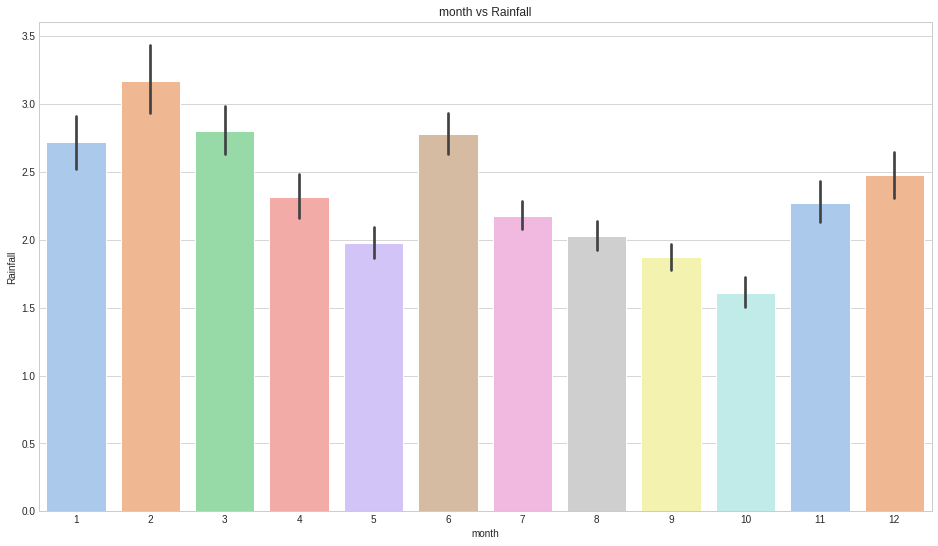

In [24]:
####
df['month'] = df['Date'].dt.month
barPlot(df,'month','Rainfall')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


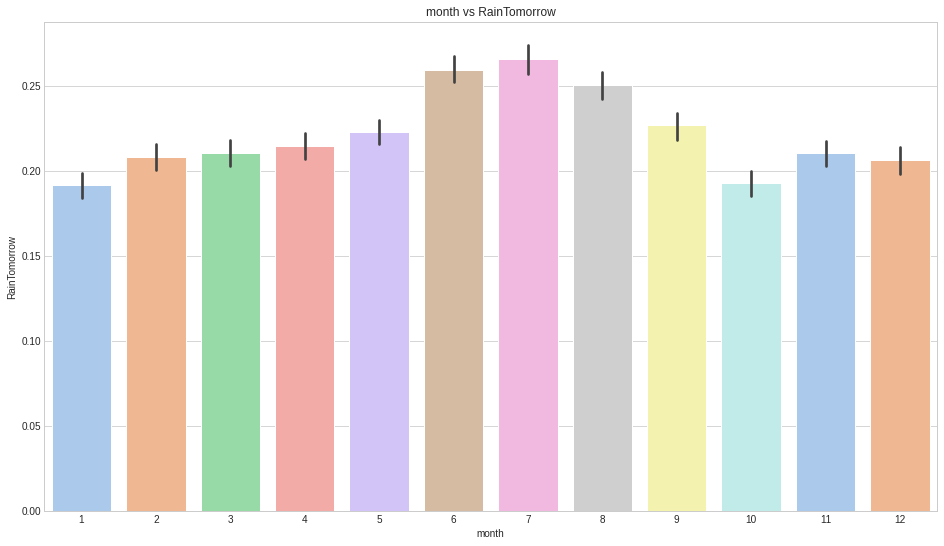

In [25]:
barPlot(df,'month','RainTomorrow')

In [26]:
####
df = getDummy(df,col = 'month',prefixes = 'month')

### Split data to train and test sets

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Date','RainTomorrow'])
Y = df.RainTomorrow
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30)

### Scale data

In [29]:
def scale(X_train,X_test):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_trainS = sc.fit_transform(X_train)
  X_testS = sc.transform(X_test)
  return (X_trainS,X_testS)
X_trainS,X_testS = scale(X_train,X_test)

### Dimension Reduction

In [30]:
df.shape

(140787, 79)

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)


In [119]:
X_trainPCAS,X_testPCAS = scale(X_trainPCA,X_testPCA)

## Exploratory Data Analysis

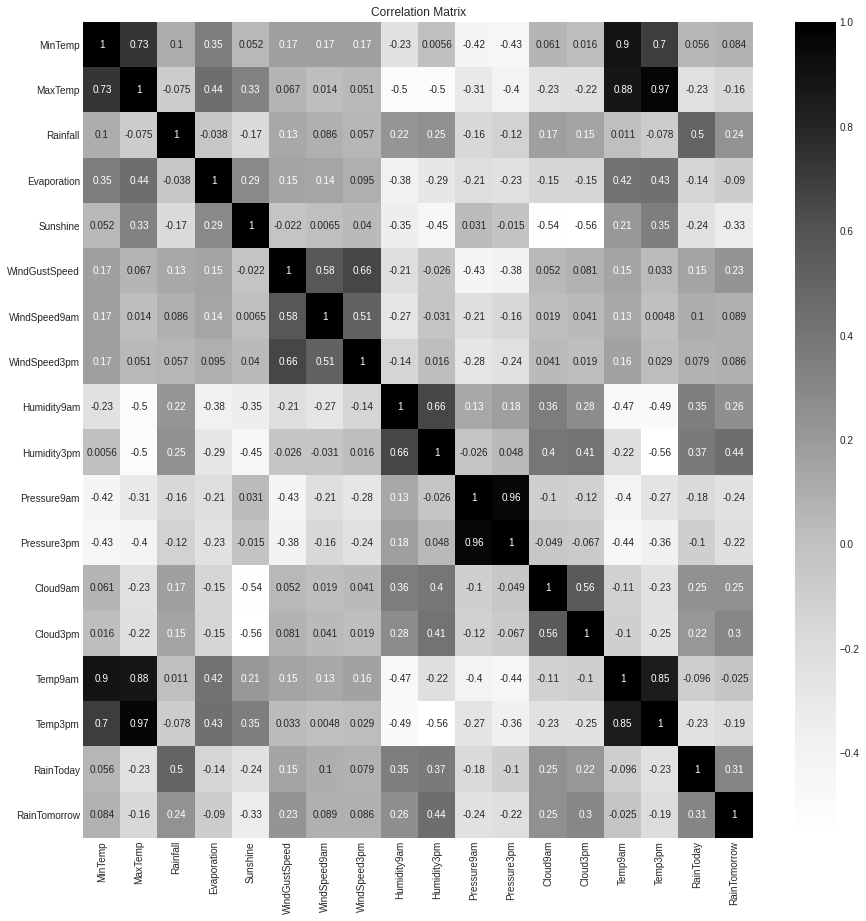

In [ ]:
def df_corr(df = df, save = False):
  plt.figure(figsize = (15,15))
  sns.heatmap(df.corr(), cmap = 'Greys',annot= True).set_title('Correlation Matrix')
  if save == True:
    plt.savefig(corr.png)
df_corr(df.iloc[:,0:19])

Text(0.5, 1.0, 'Correlation (RainTomorrow)')

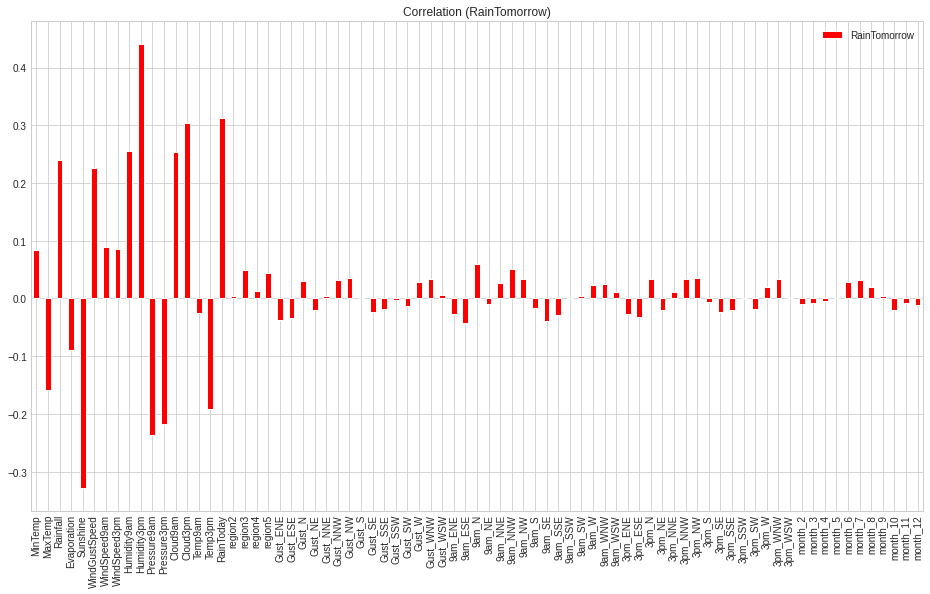

In [ ]:
pd.DataFrame(df.corr()['RainTomorrow'].drop('RainTomorrow')).plot(kind = 'bar',color = 'red',figsize = (16,9)).set_title('Correlation (RainTomorrow)')

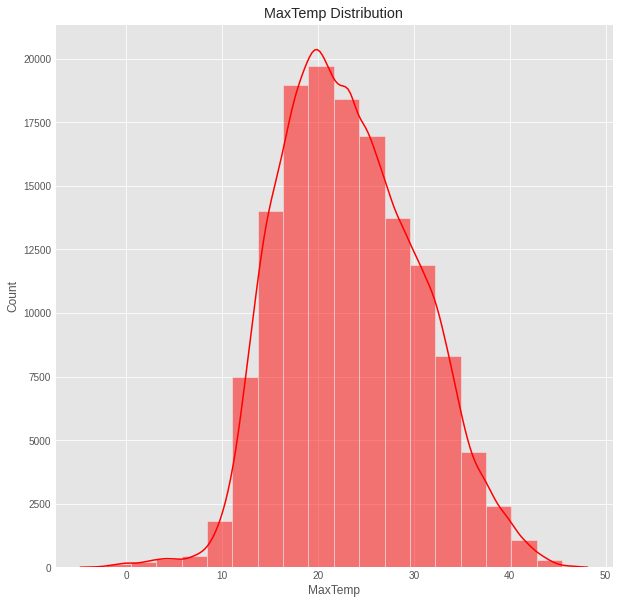

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(df.MaxTemp,kde = True, color = 'red',bins = 20)
plt.xlabel('MaxTemp')
plt.title('MaxTemp Distribution')
plt.show()

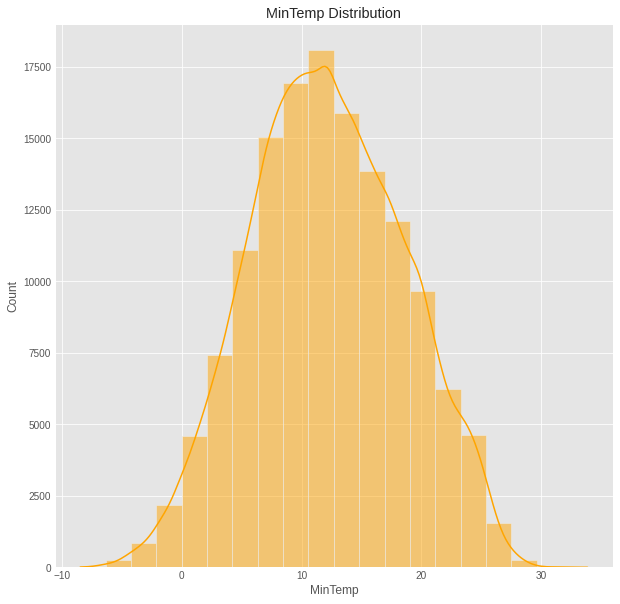

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(df.MinTemp,kde = True, color = 'orange',bins = 20)
plt.xlabel('MinTemp')
plt.title('MinTemp Distribution')
plt.show()

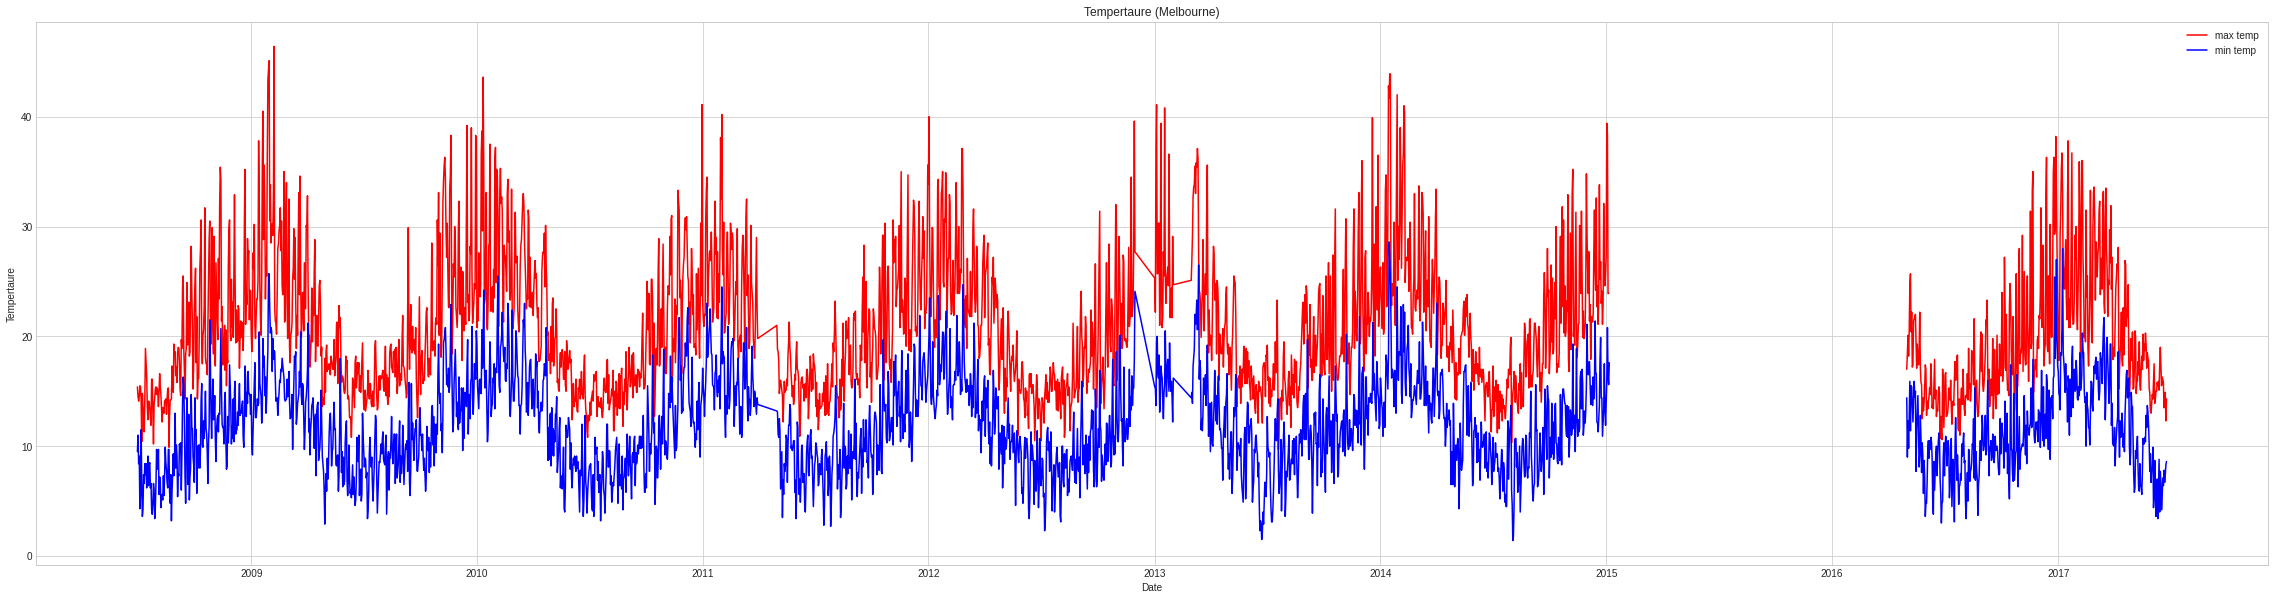

In [ ]:
full['Date'] = pd.to_datetime(full.Date,format = "%Y-%m-%d" )
Melbourne = full[full.Location == 'Melbourne']
Melbourne = Melbourne.set_index(Melbourne.Date)
# plot
plt.figure(figsize = (40,10))
plt.plot(Melbourne.index,Melbourne['MaxTemp'],color = 'red', label = "max temp")
plt.plot(Melbourne.index,Melbourne['MinTemp'],color = 'blue', label = 'min temp')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Tempertaure')
plt.title('Tempertaure (Melbourne)')
plt.show()

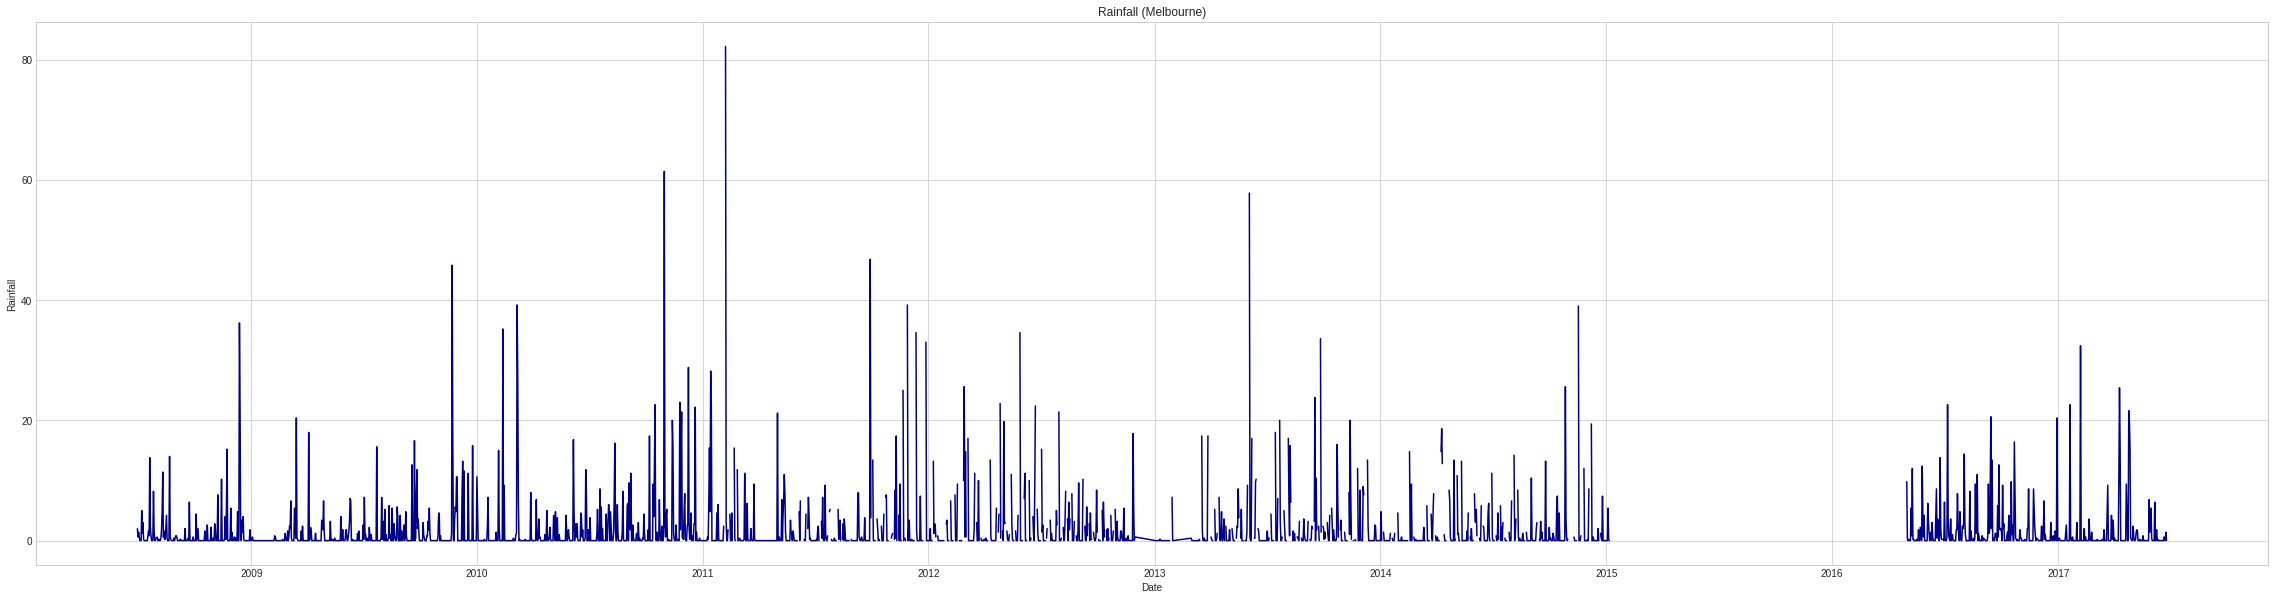

In [ ]:
plt.figure(figsize = (40,10))
plt.plot(Melbourne.index,Melbourne['Rainfall'],color = 'darkblue')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall (Melbourne)')
plt.show()

<Figure size 936x720 with 0 Axes>

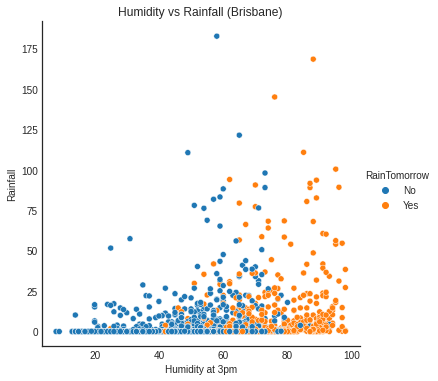

In [ ]:
Brisbane = full[full.Location == 'Brisbane']
Brisbane = Brisbane.set_index(Brisbane.Date)
# plot
plt.style.use("seaborn-white")
plt.figure(figsize=(13,10))
sns.relplot(x = 'Humidity3pm', y = 'Rainfall', data = Brisbane, hue = 'RainTomorrow')
plt.xlabel('Humidity at 3pm')
plt.ylabel('Rainfall')
plt.title('Humidity vs Rainfall (Brisbane)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

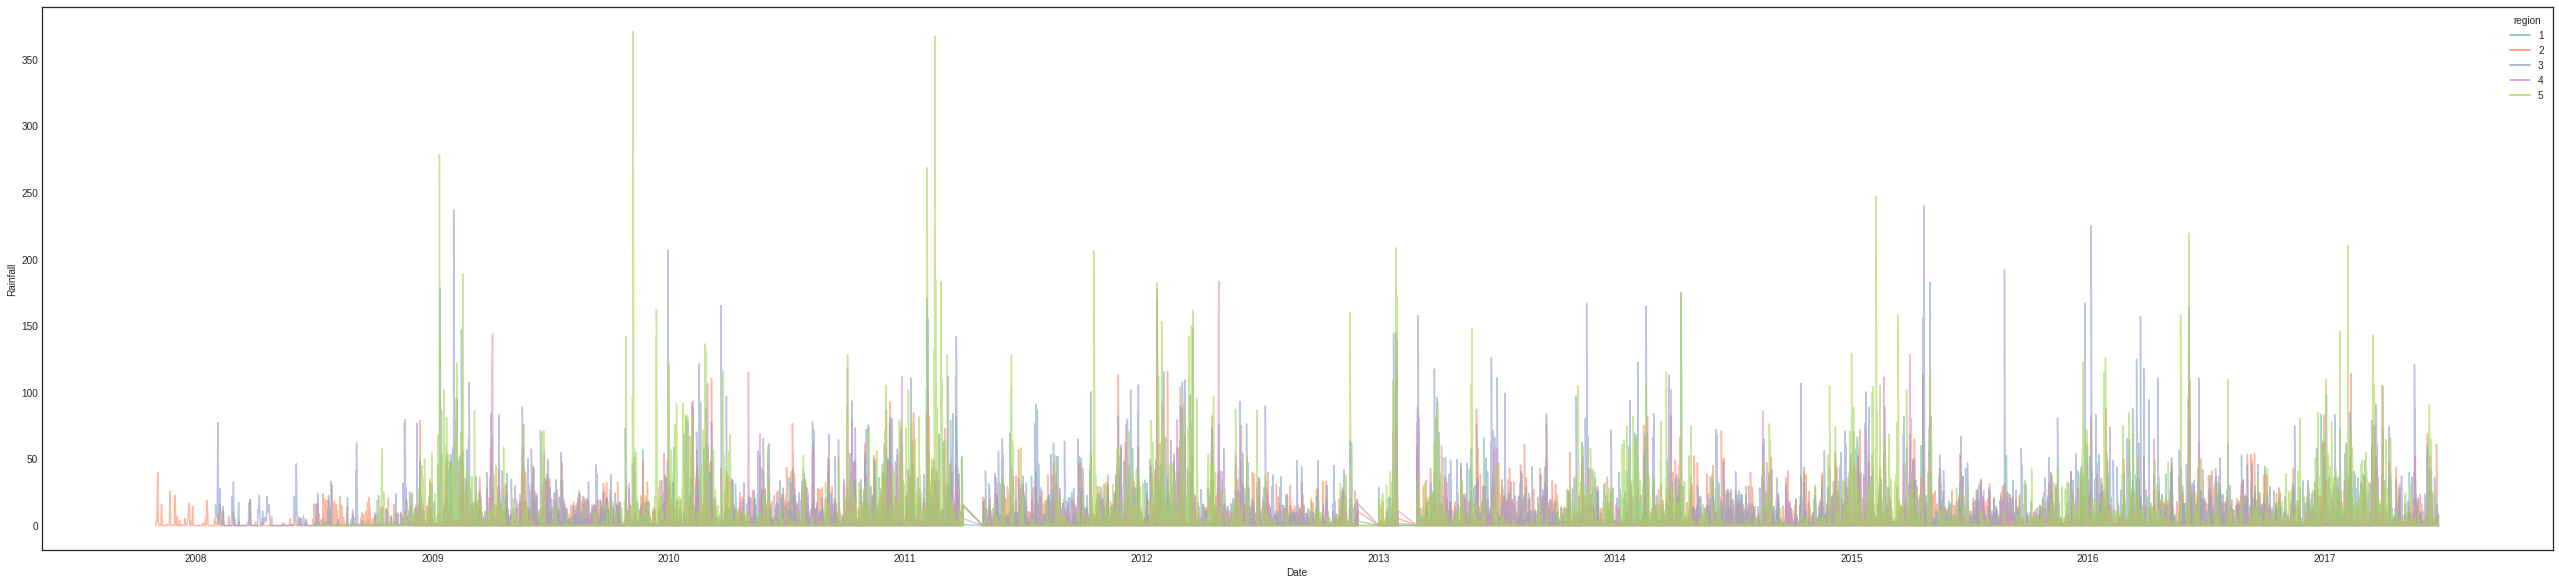

In [ ]:
df['region'] = 1
df['region'][df['region2'] == 1] = 2
df['region'][df['region3'] == 1] = 3
df['region'][df['region4'] == 1] = 4
df['region'][df['region5'] == 1] = 5

plt.figure(figsize=(45,10))
sns.lineplot(x = 'Date',y = 'Rainfall',data = df, hue = 'region',estimator = None, palette='Set2',alpha = 0.6)
df = df.drop(columns='region')

## Machine Learning Model

In [ ]:
####
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def result_table(Y_test, y_pred ):
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  print(classification_report(Y_test, y_pred))

### Logistic regression

In [ ]:
# Create a variable gives information of the columns
names = np.arange(1, 77, 1).tolist()
def colname(df, names = names):
  cols = df.columns
  dictionary = dict()
  for i, name in enumerate(names):
    dictionary[name] = cols[i]
  return dictionary
col_namnes = colname(df.drop(columns = ['Date','RainTomorrow']))
col_namnes

{1: 'MinTemp',
 2: 'MaxTemp',
 3: 'Rainfall',
 4: 'Evaporation',
 5: 'Sunshine',
 6: 'WindGustSpeed',
 7: 'WindSpeed9am',
 8: 'WindSpeed3pm',
 9: 'Humidity9am',
 10: 'Humidity3pm',
 11: 'Pressure9am',
 12: 'Pressure3pm',
 13: 'Cloud9am',
 14: 'Cloud3pm',
 15: 'Temp9am',
 16: 'Temp3pm',
 17: 'RainToday',
 18: 'region2',
 19: 'region3',
 20: 'region4',
 21: 'region5',
 22: 'Gust_ENE',
 23: 'Gust_ESE',
 24: 'Gust_N',
 25: 'Gust_NE',
 26: 'Gust_NNE',
 27: 'Gust_NNW',
 28: 'Gust_NW',
 29: 'Gust_S',
 30: 'Gust_SE',
 31: 'Gust_SSE',
 32: 'Gust_SSW',
 33: 'Gust_SW',
 34: 'Gust_W',
 35: 'Gust_WNW',
 36: 'Gust_WSW',
 37: '9am_ENE',
 38: '9am_ESE',
 39: '9am_N',
 40: '9am_NE',
 41: '9am_NNE',
 42: '9am_NNW',
 43: '9am_NW',
 44: '9am_S',
 45: '9am_SE',
 46: '9am_SSE',
 47: '9am_SSW',
 48: '9am_SW',
 49: '9am_W',
 50: '9am_WNW',
 51: '9am_WSW',
 52: '3pm_ENE',
 53: '3pm_ESE',
 54: '3pm_N',
 55: '3pm_NE',
 56: '3pm_NNE',
 57: '3pm_NNW',
 58: '3pm_NW',
 59: '3pm_S',
 60: '3pm_SE',
 61: '3pm_SSE',
 62

In [ ]:
x = sm.add_constant(np.array(X_trainS))
y = np.array(Y_train)
result = sm.GLM(y, x, data = df,family = sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               112629
Model:                            GLM   Df Residuals:                   112551
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39635.
Date:                Sun, 07 Mar 2021   Deviance:                       79269.
Time:                        18:05:05   Pearson chi2:                 1.07e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8743      0.011   -165.366      0.000      -1.897      -1.852
x1             0.0647      0.029      2.201      0.028       0.007       0.122
x2            -0.2971      0.041     -7.323      0.000      -0.377      -0.218
x3             0.0932      0.011      8.828      0.000       0.073       0.114
x4             0.0271      0.011      2.377      0.017       0.005       0.049
x5            -0.2987      0.012    -25.338      0.000      -0.322      -0.276
x6             0.6673      0.013     49.481      0.000       0.641       0.694
x7            -0.0803      0.012     -6.457      0.000      -0.105      -0.056
x8            -0.1876      0.012    -15.386      0.000      -0.211      -0.164
x9             0.0926      0.018      5.127      0.000       0.057       0.128
x10            1.1936      0.020     59.171      0.000       1.154       1.233
x11            0.7218      0.040     18.055      0.000       0.643       0.800
x12           -1.0926      0.040    -27.594      0.000      -1.170      -1.015
x13            0.0184      0.013      1.458      0.145      -0.006       0.043
x14            0.2389      0.013     19.041      0.000       0.214       0.264
x15            0.2831      0.043      6.586      0.000       0.199       0.367
x16            0.2425      0.040      6.083      0.000       0.164       0.321
x17            0.2331      0.010     22.977      0.000       0.213       0.253
x18            0.0806      0.015      5.541      0.000       0.052       0.109
x19           -0.0727      0.015     -5.012      0.000      -0.101      -0.044
x20           -0.0393      0.009     -4.148      0.000      -0.058      -0.021
x21           -0.0825      0.012     -6.871      0.000      -0.106      -0.059
x22           -0.0152      0.012     -1.271      0.204      -0.039       0.008
x23            0.0112      0.012      0.968      0.333      -0.011       0.034
x24           -0.0184      0.012     -1.500      0.134      -0.042       0.006
x25           -0.0348      0.012     -2.968      0.003      -0.058      -0.012
x26           -0.0350      0.011     -3.068      0.002      -0.057      -0.013
x27            0.0009      0.011      0.077      0.939      -0.021       0.023
x28           -0.0048      0.012     -0.410      0.682      -0.028       0.018
x29            0.0162      0.012      1.362      0.173      -0.007       0.039
x30            0.0395      0.012      3.288      0.001       0.016       0.063
x31            0.0303      0.012      2.495      0.013       0.007       0.054
x32            0.0041      0.012      0.348      0.727      -0.019       0.027
x33            0.0103      0.012      0.855      0.393      -0.013       0.034
x34           -0.0085      0.012     -0.697      0.486      -0.032       0.015
x35           -0.0126      0.012     -1.089      0.276      -0.035       0.010
x3

In [ ]:
# Predictors that have large p-values
from operator import itemgetter
predictor_P = list(itemgetter(13,22,23,24,27,28,29,32,33,34,35,36,42,45,47,54,56)(col_namnes))
predictor_P

['Cloud9am',
 'Gust_ENE',
 'Gust_ESE',
 'Gust_N',
 'Gust_NNW',
 'Gust_NW',
 'Gust_S',
 'Gust_SSW',
 'Gust_SW',
 'Gust_W',
 'Gust_WNW',
 'Gust_WSW',
 '9am_NNW',
 '9am_SE',
 '9am_SSW',
 '3pm_N',
 '3pm_NNE']

In [ ]:
def logistic(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,Y_train)
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = logistic(X_trainS, X_testS, Y_train, Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[31049  1776]
 [ 4673  4739]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32825
           1       0.73      0.50      0.60      9412

    accuracy                           0.85     42237
   macro avg       0.80      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



Increase the FALSE POSITIVE by decreasing FALSE NEGATIVE.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
y_prob = classifier.predict_proba(X_testS)
logistic_result = pd.DataFrame(y_prob[:,0].T, columns=['prob'])
logistic_result['true'] = Y_test.reset_index()['RainTomorrow']
logistic_result['predict'] = np.where(logistic_result['prob']<0.45,1,0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
result_table(logistic_result.true, logistic_result.predict)

[[28868  3957]
 [ 4577  4835]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     32825
           1       0.55      0.51      0.53      9412

    accuracy                           0.80     42237
   macro avg       0.71      0.70      0.70     42237
weighted avg       0.79      0.80      0.80     42237



### Decision Tree

In [ ]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()

In [ ]:
result_table(Y_test, y_pred)

[[28436  4389]
 [ 4318  5094]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     32825
           1       0.54      0.54      0.54      9412

    accuracy                           0.79     42237
   macro avg       0.70      0.70      0.70     42237
weighted avg       0.79      0.79      0.79     42237



In [ ]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 5)
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[32266   559]
 [ 7036  2376]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     32825
           1       0.81      0.25      0.38      9412

    accuracy                           0.82     42237
   macro avg       0.82      0.62      0.64     42237
weighted avg       0.82      0.82      0.78     42237



Not good, we increase the days that rains but predicted not rain.

In [ ]:
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[28488  4337]
 [ 4360  5052]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     32825
           1       0.54      0.54      0.54      9412

    accuracy                           0.79     42237
   macro avg       0.70      0.70      0.70     42237
weighted avg       0.79      0.79      0.79     42237



In [ ]:
# PCA data
def tree(X_train, X_test, Y_train, Y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = tree(X_trainPCAS,X_testPCAS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[27864  4961]
 [ 4758  4654]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     32825
           1       0.48      0.49      0.49      9412

    accuracy                           0.77     42237
   macro avg       0.67      0.67      0.67     42237
weighted avg       0.77      0.77      0.77     42237



### Random sample

Data is too large and takes to long to run ML models, so we randomly sample from the original data.

In [39]:
# random sampling
def random_N(n = 1000,maxRange = 10000):
  from random import uniform
  listNum = []
  i = 1
  while i < n:
    x = round(uniform(0,maxRange))
    if x not in listNum:
      listNum.append(x)
      i = i+1
  return listNum

[678, 823, 907, 855, 947, 47, 830, 322, 336]


In [67]:
def sample_data(X_trainS = X_trainS,Y_train = Y_train, n = 3000):
  i = random_N(n = n, maxRange=len(X_trainS)-2)
  X_trainSRand = X_trainS[i,:]
  Y_trainRand = Y_train.values[i]
  return (X_trainSRand,Y_trainRand)

### SVM

In [63]:
(X_trainSRand,Y_trainRand) = sample_data()

In [66]:
def svm(X_train, X_test, Y_train, Y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear')
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)

y_pred = svm(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[30996  1870]
 [ 4862  4509]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     32866
           1       0.71      0.48      0.57      9371

    accuracy                           0.84     42237
   macro avg       0.79      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



In [68]:
# Take another sample of dataset and see if the results differ
(X_trainSRand,Y_trainRand) = sample_data()
y_pred = svm(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[30985  1881]
 [ 4898  4473]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     32866
           1       0.70      0.48      0.57      9371

    accuracy                           0.84     42237
   macro avg       0.78      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



### KNN

In [79]:
(X_trainSRand,Y_trainRand) = sample_data()
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = round(np.sqrt(3000)),metric = 'minkowski', p = 2) # Standard Euclidean
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[32821    45]
 [ 9136   235]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     32866
           1       0.84      0.03      0.05      9371

    accuracy                           0.78     42237
   macro avg       0.81      0.51      0.46     42237
weighted avg       0.79      0.78      0.69     42237



In [80]:
(X_trainSRand,Y_trainRand) = sample_data(n = 5000)
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = round(np.sqrt(3000)),metric = 'minkowski', p = 2) # Standard Euclidean
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[32783    83]
 [ 8980   391]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     32866
           1       0.82      0.04      0.08      9371

    accuracy                           0.79     42237
   macro avg       0.80      0.52      0.48     42237
weighted avg       0.79      0.79      0.70     42237



In [81]:
(X_trainSRand,Y_trainRand) = sample_data(n = 10000)
def knn(X_train, X_test, Y_train, Y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = round(np.sqrt(3000)),metric = 'minkowski', p = 2) # Standard Euclidean
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = knn(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[32792    74]
 [ 8882   489]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     32866
           1       0.87      0.05      0.10      9371

    accuracy                           0.79     42237
   macro avg       0.83      0.52      0.49     42237
weighted avg       0.80      0.79      0.71     42237



### Naive bayes

In [82]:
(X_trainSRand,Y_trainRand) = sample_data()
def naive(X_train, X_test, Y_train, Y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = naive(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[26362  6504]
 [ 3418  5953]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     32866
           1       0.48      0.64      0.55      9371

    accuracy                           0.77     42237
   macro avg       0.68      0.72      0.69     42237
weighted avg       0.79      0.77      0.78     42237



In [93]:
def naive(X_train, X_test, Y_train, Y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = naive(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[25531  7335]
 [ 3369  6002]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83     32866
           1       0.45      0.64      0.53      9371

    accuracy                           0.75     42237
   macro avg       0.67      0.71      0.68     42237
weighted avg       0.79      0.75      0.76     42237



### Random Forest

In [99]:
(X_trainSRand,Y_trainRand) = sample_data()
def forest(X_train, X_test, Y_train, Y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = forest(X_trainSRand,X_testS,Y_trainRand,Y_test).ravel()
result_table(Y_test, y_pred)

[[31351  1515]
 [ 5161  4210]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32866
           1       0.74      0.45      0.56      9371

    accuracy                           0.84     42237
   macro avg       0.80      0.70      0.73     42237
weighted avg       0.83      0.84      0.83     42237



In [104]:
def forest(X_train, X_test, Y_train, Y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
    classifier.fit(X_train, Y_train)
    
    y_pred = classifier.predict(X_test)
    return(y_pred)
y_pred = forest(X_trainS,X_testS,Y_train,Y_test).ravel()
result_table(Y_test, y_pred)

[[31511  1355]
 [ 4707  4664]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     32866
           1       0.77      0.50      0.61      9371

    accuracy                           0.86     42237
   macro avg       0.82      0.73      0.76     42237
weighted avg       0.85      0.86      0.84     42237



### Neural Network

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [135]:
model = Sequential()
model.add(Dense(77,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(33,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)
model.fit(x = X_trainS, y = Y_train, epochs = 100, validation_data=(X_testS,Y_test), callbacks = [earstop])

Epoch 1/100
3080/3080 [==============================] - 8s 2ms/step - loss: 0.5902 - val_loss: 0.4222
Epoch 2/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4524 - val_loss: 0.3993
Epoch 3/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4445 - val_loss: 0.3897
Epoch 4/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4387 - val_loss: 0.4159
Epoch 5/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4389 - val_loss: 0.3935
Epoch 6/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4355 - val_loss: 0.4006
Epoch 7/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4353 - val_loss: 0.3922
Epoch 8/100
3080/3080 [==============================] - 7s 2ms/step - loss: 0.4365 - val_loss: 0.3934
Epoch 00008: early stopping


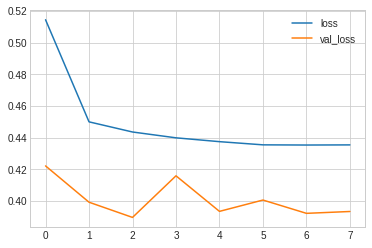

In [136]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [137]:
y_pred = model.predict_classes(X_testS)
result_table(Y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[32760   106]
 [ 7844  1527]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     32866
           1       0.94      0.16      0.28      9371

    accuracy                           0.81     42237
   macro avg       0.87      0.58      0.58     42237
weighted avg       0.84      0.81      0.76     42237



## Conclusion

Simple logistic regression and random forest have gave us good results.
Decsion tree gave us a result that minimize False Positive.

In [141]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_trainS,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
for_classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
for_classifier.fit(X_trainS, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes = 5)
tree_classifier.fit(X_trainS, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
def Prediction(i = 100):
  x = sc.transform(pd.DataFrame(X_train.iloc[i]).T)
  print('Logistic regression prediction:',log_classifier.predict(x),'True:',Y_train.iloc[i])
  print('Random forest prediction:',for_classifier.predict(x),'True:',Y_train.iloc[i])
  print('Decision tree prediction:',tree_classifier.predict(x),'True:',Y_train.iloc[i])

In [167]:
Prediction()

Logistic regression prediction: [0] True: 0
Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0


In [168]:
Prediction(i = 1000)

Logistic regression prediction: [0] True: 1
Random forest prediction: [1] True: 1
Decision tree prediction: [0] True: 1


In [176]:
Prediction(i = 121)

Logistic regression prediction: [1] True: 0
Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0


In [170]:
Prediction(i = 1500)

Logistic regression prediction: [1] True: 1
Random forest prediction: [1] True: 1
Decision tree prediction: [1] True: 1


In [171]:
Prediction(i = 5000)

Logistic regression prediction: [0] True: 0
Random forest prediction: [0] True: 0
Decision tree prediction: [0] True: 0
